In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "f1", "grad", "finished"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,nPop,error,time_minutes,1,2,3,4,5,6
0,20,7.568711,5.710965,196.500546,935.965309,1440.469706,1777.563363,2292.133997,3226.027119
1,25,6.163299,9.060183,192.909250,802.254271,1414.039139,1602.794586,2309.323965,3164.488984
2,30,6.117734,9.454876,196.257535,812.742603,1463.810490,1737.643290,2208.427246,3183.803840
3,35,9.031656,11.160577,190.328285,828.544033,1471.693203,1483.007519,2313.707287,3321.736006
4,40,6.235946,15.208135,192.909907,801.996429,1418.852616,1639.608013,2282.275225,3265.109720


In [3]:
data.describe()

,nPop,error,time_minutes,1,2,3,4,5,6
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,32.500000,6.845021,10.628215,192.777013,837.629039,1424.928177,1662.513554,2301.435562,3208.145342
std,8.574929,1.333687,3.215894,6.909282,37.052677,32.809660,90.791330,96.332356,69.549385
min,20.000000,4.747632,5.084093,169.731714,767.956657,1344.957395,1454.363670,1916.230141,3028.991201
25%,25.000000,5.923729,8.012865,189.524087,811.443696,1403.249108,1615.245196,2259.352917,3165.350317
50%,32.500000,6.446798,10.471186,193.873946,828.241871,1418.770221,1677.225596,2307.634096,3204.431722
75%,40.000000,7.473266,13.504310,198.144349,855.110859,1444.069450,1726.050009,2358.053985,3245.753147
max,45.000000,11.673569,18.429167,205.252746,945.348477,1516.366375,1859.001953,2508.969023,3397.576340


### Natural frequencies

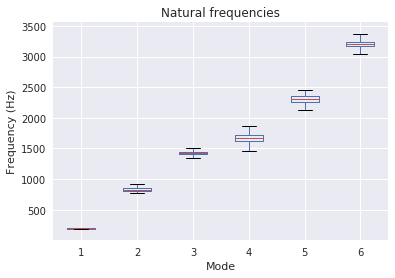

In [4]:
freq = data.drop(['error', 'time_minutes', 'nPop'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Grouping by population size

In [5]:
errors = data.drop(['time_minutes'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.groupby('nPop').describe()

error                                                              \
     count      mean       std       min       25%       50%       75%   
nPop                                                                     
20    20.0  8.259988  1.418139  5.317395  7.454979  8.203025  9.159339   
25    20.0  6.750732  1.021180  5.528890  6.140997  6.504235  6.853613   
30    20.0  6.763810  1.282011  4.867823  6.031651  6.558604  7.364840   
35    20.0  7.057212  1.407403  4.869785  6.084361  6.658837  8.010170   
40    20.0  6.335819  0.791185  4.942402  5.923010  6.182319  6.838019   
45    20.0  5.902567  0.676075  4.747632  5.516061  5.746589  6.050257   

                 
            max  
nPop             
20    11.673569  
25     9.871755  
30     9.976866  
35    10.124671  
40     8.265938  
45     7.274255

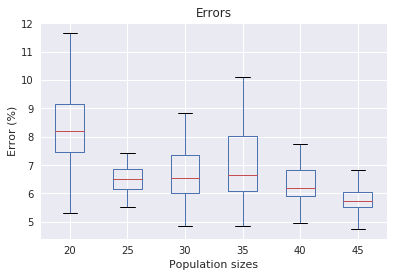

In [6]:
errors.boxplot(column='error', by='nPop')
plt.suptitle("")
plt.title("Errors")
plt.xlabel("Population sizes")
plt.ylabel("Error (%)")
plt.show()

In [7]:
times = data.drop(['error'], axis=1)
times.drop([x for x in times.columns if type(x)==int], axis=1, inplace=True)

times.groupby('nPop').describe()

time_minutes                                                        \
            count       mean       std        min        25%        50%   
nPop                                                                      
20           20.0   6.415194  0.725562   5.084093   6.085747   6.440505   
25           20.0   8.015344  1.078029   5.982017   7.220569   8.224224   
30           20.0   9.548540  1.034841   7.974619   9.039435   9.308349   
35           20.0  11.249876  1.223343   8.193252  10.756247  11.160276   
40           20.0  13.250997  1.192869  10.384805  12.769038  13.260310   
45           20.0  15.289341  1.216469  13.642601  14.401430  15.225851   

                            
            75%        max  
nPop                        
20     6.803766   7.905505  
25     8.703388   9.884503  
30     9.894665  12.383600  
35    11.960170  14.128766  
40    13.999230  15.256251  
45    15.782765  18.429167

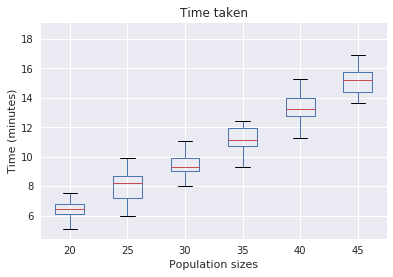

In [8]:
times.boxplot(column='time_minutes', by='nPop')
plt.suptitle("")
plt.title("Time taken")
plt.xlabel("Population sizes")
plt.ylabel("Time (minutes)")
plt.show()